In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import warnings
import pickle
from scipy import stats

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

data = pd.read_csv("/content/Data_Train.csv")
data.head()
data.shape
data.isnull().sum()
data.dropna(inplace=True)
data.isnull().sum()
Category = ['Airline', 'Source', 'Destination', 'Additional_Info']

for i in Category:
    print(i, data[i].unique())
category_cols=data.select_dtypes (include=['object']) .columns
category_cols
#plotting a barchart for each of the categorical value
#for column in category_cols:
  #plt.figure(figsize=(20,4))
  #plt.subplot(121)
  #data[column].value_counts().plot(kind='bar')
  #plt.title(column)
data.Route =  data.Route.str.split('->')
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data. Route.str[2] 
data['City4']=data. Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data. Route.str[5]
data.Date_of_Journey=data.Date_of_Journey.str.split('/')
data.Date_of_Journey

#Treating the data_column
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]
data.Dep_Time=data.Dep_Time.str.split(':')
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]
data.Arrival_Time=data.Arrival_Time.str.split(' ')
data['Arrival_date']=data.Arrival_Time.str[1] 
data['Time_of_Arrival']=data. Arrival_Time.str[0]
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')
data['Arrival_Time_Hour' ]=data.Time_of_Arrival.str[0]
data['Arrival_Time_Mins']=data.Time_of_Arrival.str[1]
#Next, we divide the 'Duration' column to 'Travel_hours' and Travel_mins'
data.Duration=data.Duration.str.split(' ')
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours = data. Travel_Hours
data['Travel_Mins']=data.Duration.str[1]

#Next, we divide the 'Duration' column to 'Travel_hours' and Travel_mins'  24
data.Duration=data.Duration.str.split(' ')




Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


In [3]:
data['Duration'] = data['Duration'].astype(str)
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h') 
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours =data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]
data. Travel_Mins=data.Travel_Mins.str.split('m')   
data.Travel_Mins=data.Travel_Mins.str[0]

In [4]:
data. Total_Stops.replace('non_stop', 0, inplace=True)
data. Total_Stops = data. Total_Stops.str.split(' ')
data. Total_Stops=data. Total_Stops.str[0]

In [5]:
data. Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [6]:
data. Additional_Info.replace('No Info', 'No info', inplace=True)
data.isnull().sum


<bound method NDFrame._add_numeric_operations.<locals>.sum of        Airline  Date_of_Journey  Source  Destination  Route  Dep_Time  \
0        False            False   False        False  False     False   
1        False            False   False        False  False     False   
2        False            False   False        False  False     False   
3        False            False   False        False  False     False   
4        False            False   False        False  False     False   
...        ...              ...     ...          ...    ...       ...   
10678    False            False   False        False  False     False   
10679    False            False   False        False  False     False   
10680    False            False   False        False  False     False   
10681    False            False   False        False  False     False   
10682    False            False   False        False  False     False   

       Arrival_Time  Duration  Total_Stops  Additional_Info  

In [7]:
if 'City4' in data.columns and 'City5' in data.columns and 'City6' in data.columns:
    data.drop(['City4', 'City5', 'City6'], axis=1, inplace=True)

print(data.columns)



Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'City1', 'City2', 'City3', 'Date', 'Month',
       'Year', 'Dep_Time_Hour', 'Dep_Time_Mins', 'Arrival_date',
       'Time_of_Arrival', 'Arrival_Time_Hour', 'Arrival_Time_Mins',
       'Travel_Hours', 'Travel_Mins'],
      dtype='object')


In [8]:
data.drop(['Date_of_Journey','Route', 'Dep_Time','Arrival_Time','Duration'], axis=1, inplace=True)
data.drop(['Time_of_Arrival'], axis=1, inplace=True)


In [9]:
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10682 non-null  object 
 1   Source             10682 non-null  object 
 2   Destination        10682 non-null  object 
 3   Total_Stops        10682 non-null  object 
 4   Additional_Info    10682 non-null  object 
 5   Price              10682 non-null  int64  
 6   City1              10682 non-null  object 
 7   City2              0 non-null      float64
 8   City3              0 non-null      float64
 9   Date               10682 non-null  object 
 10  Month              10682 non-null  object 
 11  Year               10682 non-null  object 
 12  Dep_Time_Hour      10682 non-null  object 
 13  Dep_Time_Mins      10682 non-null  object 
 14  Arrival_date       4334 non-null   object 
 15  Arrival_Time_Hour  10682 non-null  object 
 16  Arrival_Time_Mins  106

In [10]:
data['City3'].fillna ('None', inplace=True)
data['City2'].fillna ('None', inplace=True)
data['Arrival_date'].fillna (data['Date'], inplace=True)
data['Travel_Mins'].fillna(0,inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Total_Stops        10682 non-null  object
 4   Additional_Info    10682 non-null  object
 5   Price              10682 non-null  int64 
 6   City1              10682 non-null  object
 7   City2              10682 non-null  object
 8   City3              10682 non-null  object
 9   Date               10682 non-null  object
 10  Month              10682 non-null  object
 11  Year               10682 non-null  object
 12  Dep_Time_Hour      10682 non-null  object
 13  Dep_Time_Mins      10682 non-null  object
 14  Arrival_date       10682 non-null  object
 15  Arrival_Time_Hour  10682 non-null  object
 16  Arrival_Time_Mins  10682 non-null  objec

In [11]:
data.Date=data.Date.astype('int64')
data.Month=data. Month.astype('int64')
data.Year=data.Year.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64')

data. Arrival_date=data.Arrival_date.astype("int64")
data.Arrival_Time_Hour=data. Arrival_Time_Hour.astype('int64')
data. Arrival_Time_Mins=data. Arrival_Time_Mins.astype('int64') 


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Total_Stops        10682 non-null  object
 4   Additional_Info    10682 non-null  object
 5   Price              10682 non-null  int64 
 6   City1              10682 non-null  object
 7   City2              10682 non-null  object
 8   City3              10682 non-null  object
 9   Date               10682 non-null  int64 
 10  Month              10682 non-null  int64 
 11  Year               10682 non-null  int64 
 12  Dep_Time_Hour      10682 non-null  int64 
 13  Dep_Time_Mins      10682 non-null  int64 
 14  Arrival_date       10682 non-null  int64 
 15  Arrival_Time_Hour  10682 non-null  int64 
 16  Arrival_Time_Mins  10682 non-null  int64

In [13]:
data[data['Travel_Hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins


In [14]:
data.Travel_Hours=data.Travel_Hours.astype('int64')


ValueError: ignored

In [15]:
categorical=['Airline', 'Source', 'Destination', 'Additional Info', 'City1']


In [16]:
numerical=['Total_Stops', 'Date', 'Month', 'Year', 'Dep_Time_Hour', 'Dep_Time_Mins', 'Arrival_date', 'Arrival_Time_Hour', 'Arrival_Time_Mins', 'Travel_Hours', 'Travel_Mins']

KeyError: ignored

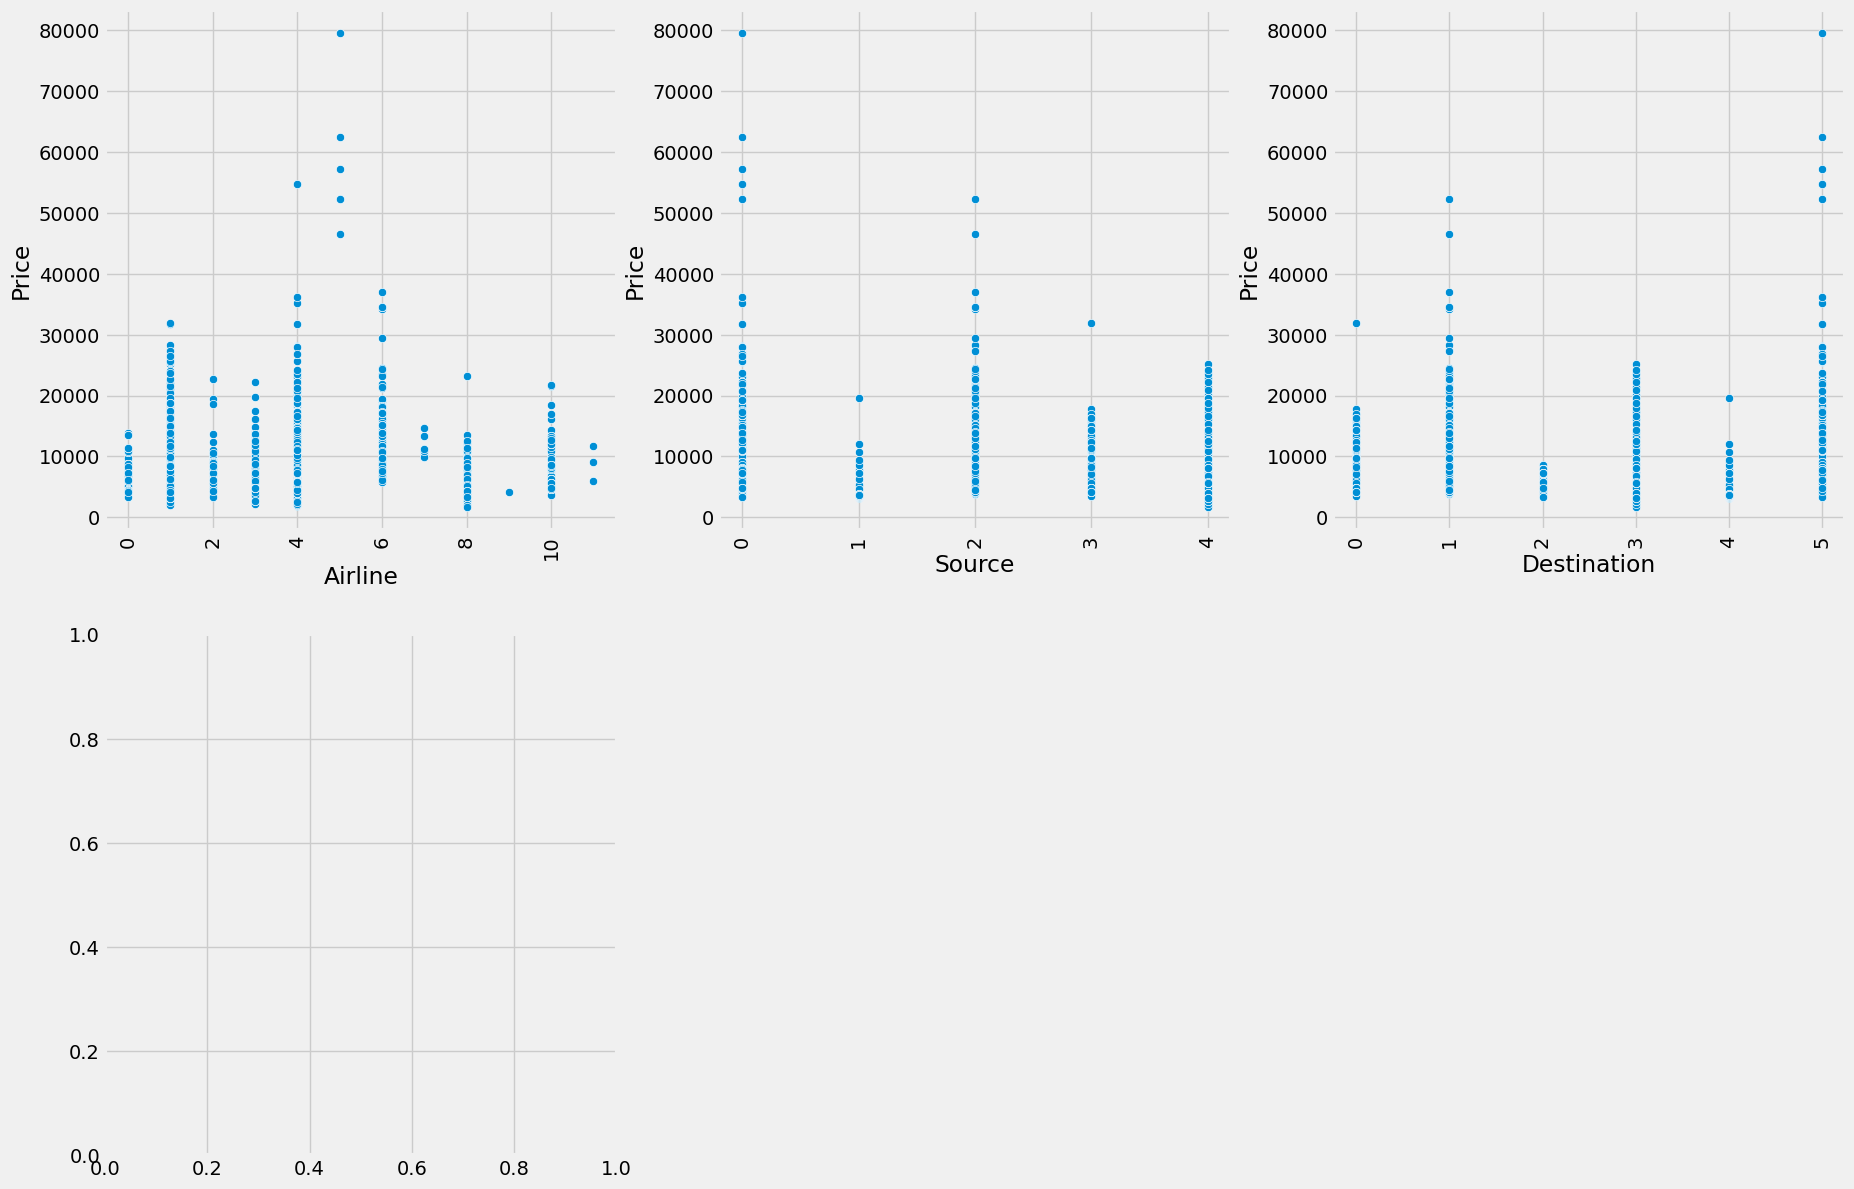

In [ ]:
import seaborn as sns
c=1
plt.figure(figsize=(20,45))
for i in categorical:
  plt.subplot(6,3,c)
  sns.scatterplot(x=data[i],y=data.Price)
  plt.xticks(rotation=90)

  c=c+1
plt.show()



In [17]:
data[data. Price>50000]
data.head()
pd.set_option('display.max_columns',25)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,BLR ? DEL,None,None,24,3,2019,22,20,22,1,10,n,a
1,Air India,Kolkata,Banglore,2,No info,7662,CCU ? IXR ? BBI ? BLR,None,None,1,5,2019,5,50,1,13,15,n,a
2,Jet Airways,Delhi,Cochin,2,No info,13882,DEL ? LKO ? BOM ? COK,None,None,9,6,2019,9,25,10,4,25,n,a
3,IndiGo,Kolkata,Banglore,1,No info,6218,CCU ? NAG ? BLR,None,None,12,5,2019,18,5,12,23,30,n,a
4,IndiGo,Banglore,New Delhi,1,No info,13302,BLR ? NAG ? DEL,None,None,1,3,2019,16,50,1,21,35,n,a


<Axes: >

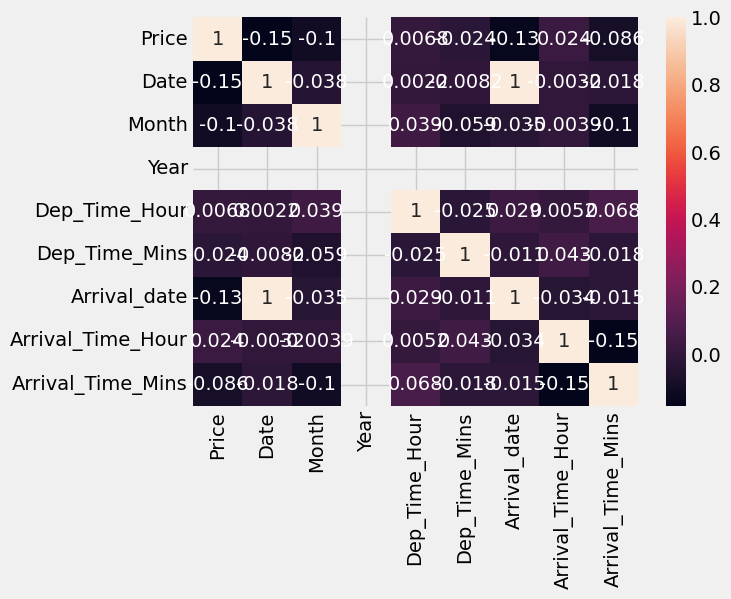

In [18]:
data['Year'].max()
sns.heatmap (data.corr(), annot=True)


<Axes: xlabel='Price', ylabel='Density'>

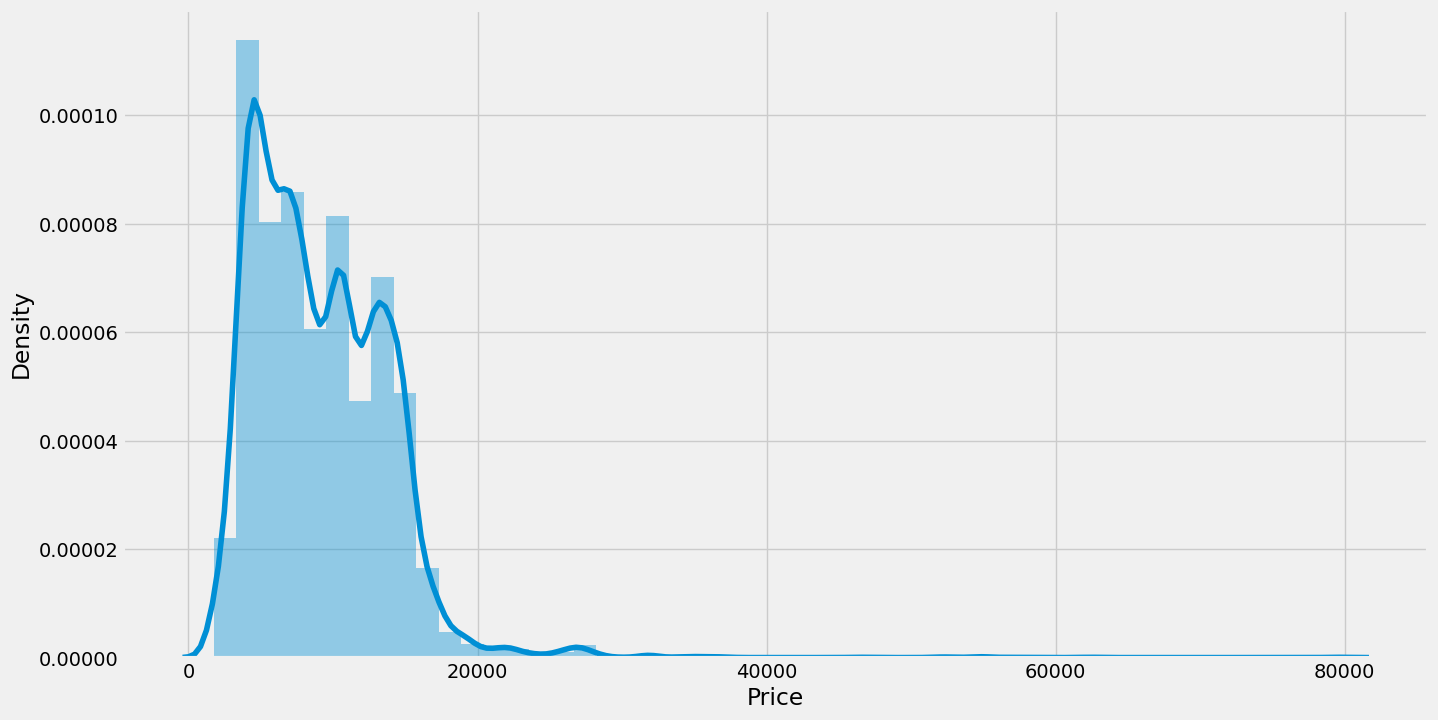

In [19]:
plt.figure(figsize=(15,8))
sns.distplot(data.Price)

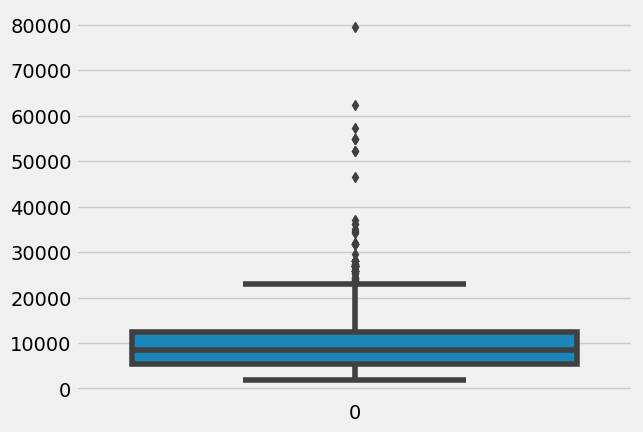

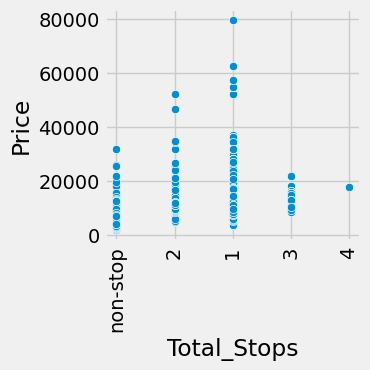

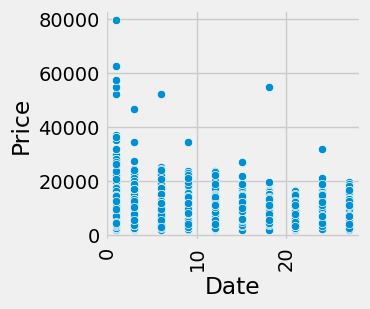

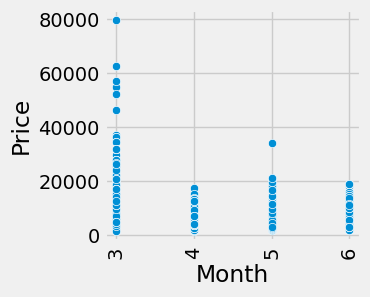

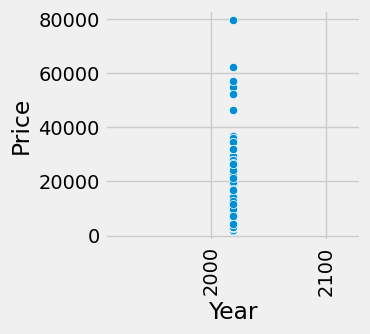

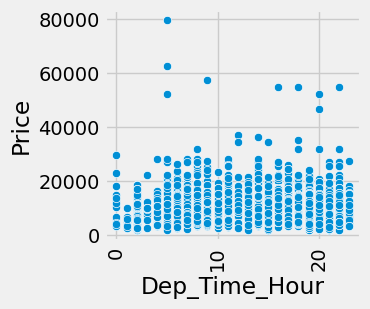

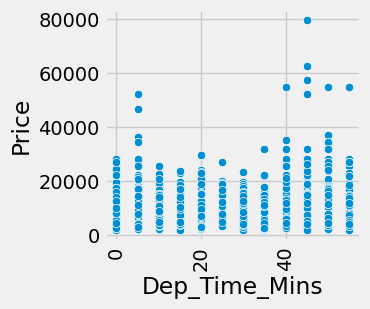

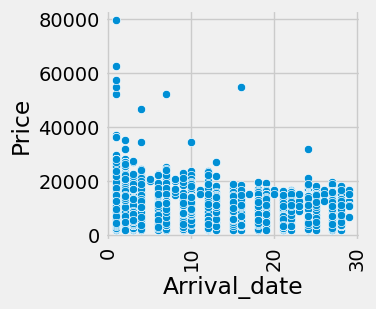

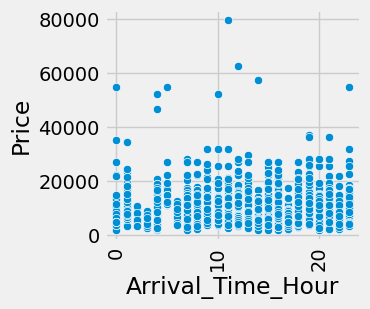

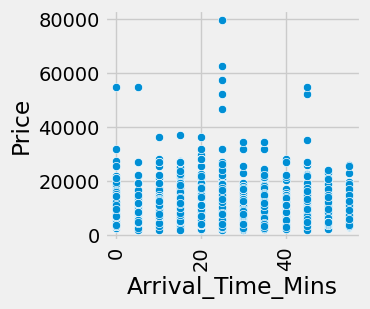

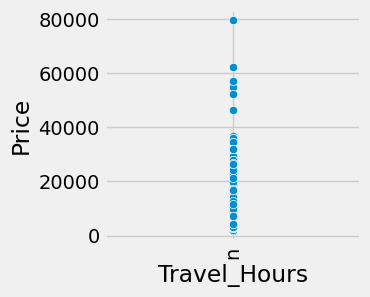

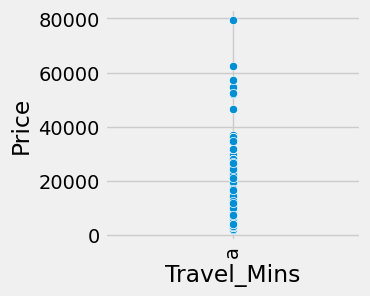

In [20]:
import seaborn as sns
sns.boxplot(data['Price'])


c=1
for i in numerical:
  plt.figure(figsize=(10,20))
  plt.subplot(6,3,c)
  sns.scatterplot(x = data[i], y=data.Price)
  plt.xticks(rotation=90)
#plt. tight_Layout (pad=3.0)
  C=c+1
plt.show()

In [21]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Airline = le.fit_transform (data. Airline)
data.Source = le.fit_transform(data.Source)
data.Destination = le.fit_transform(data. Destination)
data.Total_Stops= le.fit_transform(data. Total_Stops)
data.City1=le.fit_transform(data.City1)
data.City2=le.fit_transform(data.City2)
data.City3=le.fit_transform(data.City3)
data.Additional_Info = le.fit_transform(data. Additional_Info)
data.head()
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,4,7,3897,18,0,0,24,3,2019,22,20,22,1,10,n,a
1,1,3,0,1,7,7662,84,0,0,1,5,2019,5,50,1,13,15,n,a
2,4,2,1,1,7,13882,118,0,0,9,6,2019,9,25,10,4,25,n,a
3,3,3,0,0,7,6218,91,0,0,12,5,2019,18,5,12,23,30,n,a
4,3,0,5,0,7,13302,29,0,0,1,3,2019,16,50,1,21,35,n,a


In [22]:
data = data[['Airline', 'Source', 'Destination', 'Date', 'Month', 'Year', 'Dep_Time_Hour', 'Dep_Time_Mins','Arrival_date', 'Arrival_Time_Hour', 'Arrival_Time_Mins', 'Price' ]]
data.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Price
0,3,0,5,24,3,2019,22,20,22,1,10,3897
1,1,3,0,1,5,2019,5,50,1,13,15,7662
2,4,2,1,9,6,2019,9,25,10,4,25,13882
3,3,3,0,12,5,2019,18,5,12,23,30,6218
4,3,0,5,1,3,2019,16,50,1,21,35,13302


In [23]:
### Scaling the Data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
datal = ss.fit_transform(data)
datal = pd.DataFrame(datal, columns=data.columns)
datal.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Price
0,-0.410805,-1.658359,2.416534,1.237288,-1.467402,0.0,1.654154,-0.234950,0.955751,-1.800436,-0.890014,-1.125535
1,-1.261152,0.890014,-0.973812,-1.475307,0.250289,0.0,-1.303113,1.363607,-1.524622,-0.050909,-0.587094,-0.309068
2,0.014369,0.040556,-0.295743,-0.531796,1.109135,0.0,-0.607286,0.031476,-0.461605,-1.363054,0.018745,1.039783
3,-0.410805,0.890014,-0.973812,-0.177979,0.250289,0.0,0.958326,-1.034229,-0.225379,1.407030,0.321664,-0.622209
4,-0.410805,-1.658359,2.416534,-1.475307,-1.467402,0.0,0.610412,1.363607,-1.524622,1.115442,0.624584,0.914006


In [24]:
y = datal['Price']
x = datal.drop(columns = ['Price'], axis=1)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [26]:
x_train.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins
10004,0.864716,0.040556,-0.295743,1.591104,0.250289,0.0,-0.781243,0.297903,1.546317,0.823854,-0.587094
3684,0.014369,0.040556,-0.295743,-0.531796,0.250289,0.0,-0.259372,0.297903,-0.461605,-0.196703,0.624584
1034,1.715063,0.040556,-0.295743,1.237288,-0.608557,0.0,0.436456,1.097181,1.191977,1.261236,-1.192933
3909,0.864716,0.040556,-0.295743,0.883471,-1.467402,0.0,-0.085415,1.363607,0.955751,-1.800436,0.624584
3088,-1.261152,0.040556,-0.295743,1.237288,1.109135,0.0,0.784369,-0.501376,1.310091,0.823854,-0.587094


In [27]:
x_train.shape

(8545, 11)

In [28]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
rfr = RandomForestRegressor()
gb = GradientBoostingRegressor()
ad = AdaBoostRegressor()
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
for i in [rfr, gb,ad]:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  test_score=r2_score (y_test,y_pred)
  train_score=r2_score (y_train, i.predict(x_train))
if abs (train_score-test_score)<=0.2:
  print(i)
print("R2 score is", r2_score (y_test,y_pred))
print("R2 for train data", r2_score (y_train, i.predict(x_train)))
print("Mean Absolute Error is", mean_absolute_error(y_pred,y_test))
print("Mean Squared Error is", mean_squared_error(y_pred,y_test))
print("Root Mean Sqaured Error is", (mean_squared_error(y_pred,y_test, squared=False)))

AdaBoostRegressor()
R2 score is 0.2312088878059766
R2 for train data 0.2542400119728838
Mean Absolute Error is 0.7277706829573921
Mean Squared Error is 0.7795528600423585
Root Mean Sqaured Error is 0.8829229071908592


In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
knn=KNeighborsRegressor()
svr=SVR()
dt=DecisionTreeRegressor()
for i in [knn, svr,dt]:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  test_score=r2_score (y_test,y_pred)
  train_score=r2_score (y_train,i.predict(x_train))
  if abs(train_score-test_score)<=0.1:
    print(i)
    print('R2 Score is', r2_score (y_test,y_pred))
    print('R2 Score for train data', r2_score (y_train, i.predict(x_train)))
    print('Mean Absolute Error is', mean_absolute_error(y_test,y_pred))
    print('Mean Squared Error is', mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error is', (mean_squared_error(y_test, y_pred, squared=False)))

KNeighborsRegressor()
R2 Score is 0.71330321357875
R2 Score for train data 0.7937771515752566
Mean Absolute Error is 0.3638883812008177
Mean Squared Error is 0.2907100462982903
Root Mean Squared Error is 0.5391753391043496
SVR()
R2 Score is 0.6251303173221399
R2 Score for train data 0.5989238470831302
Mean Absolute Error is 0.41241386152058
Mean Squared Error is 0.38011721082559236
Root Mean Squared Error is 0.6165364635004099


In [30]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
  cv=cross_val_score (rfr,x,y,cv=i)
  print(rfr,cv.mean())


RandomForestRegressor() 0.7885496039466171
RandomForestRegressor() 0.7912681333132453
RandomForestRegressor() 0.7988817483331185


In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
model = keras.Sequential()
model.add(Dense (7, activation = 'relu', input_dim=11))
model.add(Dense (7, activation='relu'))
model.add(Dense(1, activation="linear"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 84        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 148
Trainable params: 148
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss = 'mse', optimizer ='rmsprop', metrics=['mae'])
model.fit(x_train, y_train, batch_size = 20, epochs = 10)

Epoch 1/10
428/428 [==============================] - 2s 3ms/step - loss: 1.0117 - mae: 0.7981
Epoch 2/10
428/428 [==============================] - 1s 2ms/step - loss: 0.8814 - mae: 0.7394
Epoch 3/10
428/428 [==============================] - 1s 2ms/step - loss: 0.7782 - mae: 0.6815
Epoch 4/10
428/428 [==============================] - 1s 2ms/step - loss: 0.7000 - mae: 0.6349
Epoch 5/10
428/428 [==============================] - 1s 2ms/step - loss: 0.6661 - mae: 0.6144
Epoch 6/10
428/428 [==============================] - 1s 2ms/step - loss: 0.6427 - mae: 0.6006
Epoch 7/10
428/428 [==============================] - 1s 2ms/step - loss: 0.6229 - mae: 0.5893
Epoch 8/10
428/428 [==============================] - 1s 2ms/step - loss: 0.6074 - mae: 0.5806
Epoch 9/10
428/428 [==============================] - 1s 2ms/step - loss: 0.5958 - mae: 0.5731
Epoch 10/10
428/428 [==============================] - 1s 2ms/step - loss: 0.5831 - mae: 0.5665


In [33]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
  cv=cross_val_score (rfr,x,y,cv=i)
  print (rfr, cv.mean())
from sklearn.model_selection import RandomizedSearchCV
param_grid={'n_estimators': [10, 30, 50, 70, 100], 'max_depth': [None, 1, 2, 3], 'max_features': ['auto', 'sqrt']}
rfr=RandomForestRegressor()
rf_res = RandomizedSearchCV(estimator=rfr, param_distributions=param_grid, cv=3, verbose=2,n_jobs=-1)
rf_res.fit(x_train,y_train)

RandomForestRegressor() 0.7891065322612385
RandomForestRegressor() 0.7919588196370496
RandomForestRegressor() 0.8000520014953008
Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [34]:
gb = GradientBoostingRegressor()

# Define parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Perform randomized search over parameter grid
gb_res = RandomizedSearchCV(estimator=gb, param_distributions=param_grid, cv=3, verbose=2, n_jobs=-1)
gb_res.fit(x_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 150]},
                   verbose=2)

In [ ]:
rfr=RandomForestRegressor (n_estimators=10, max_features='sqrt', max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy", r2_score (y_train_pred,y_train))
print("test accuracy", r2_score (y_test_pred,y_test))

train accuracy 0.9297123116878924
test accuracy 0.7740524823579749


In [35]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
  cv=cross_val_score (gb, x,y,cv=i)
  print (rfr, cv.mean())

RandomForestRegressor() 0.7256658572888829
RandomForestRegressor() 0.7287985867488244
RandomForestRegressor() 0.7262735117073871


In [36]:
gb=GradientBoostingRegressor (n_estimators=10, max_features='sqrt', max_depth=None)
gb.fit(x_train,y_train)
y_train_pred=gb.predict(x_train)
y_test_pred=gb.predict(x_test)
print("train accuracy", r2_score (y_train_pred,y_train)) 
print("test accuracy", r2_score (y_test_pred,y_test))


train accuracy 0.6344604236553266
test accuracy 0.17612933663567254


In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
knn=KNeighborsRegressor()
svr=SVR()
dt=DecisionTreeRegressor()
for i in [knn, svr,dt]:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  test_score=r2_score (y_test,y_pred)
  train_score=r2_score (y_train, i.predict(x_train))
  if abs(train_score-test_score)<=0.1:
    print(i)


KNeighborsRegressor()
SVR()


In [38]:

knn=KNeighborsRegressor (n_neighbors=2, algorithm= 'auto', metric_params=None, n_jobs=-1)
knn.fit(x_train,y_train)
y_train_pred-knn.predict(x_train)
y_test_pred-knn.predict(x_test)
print("train accuracy", r2_score (y_train_pred,y_train))
print("test accuracy", r2_score (y_test_pred,y_test))


train accuracy 0.6344604236553266
test accuracy 0.17612933663567254


In [39]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
  cv=cross_val_score (knn, x,y,cv=i)
  print (knn, cv.mean())
predicted_values = pd.DataFrame({'Actual' :y_test, 'Predicted' :y_pred})
predicted_values

KNeighborsRegressor(n_jobs=-1, n_neighbors=2) 0.6294690516479304
KNeighborsRegressor(n_jobs=-1, n_neighbors=2) 0.6445146321877687
KNeighborsRegressor(n_jobs=-1, n_neighbors=2) 0.6668966957592561


,Actual,Predicted
6075,1.641128,1.681246
3544,-0.895232,-0.003950
9290,0.021639,-0.217337
5032,-1.133992,-1.190592
2483,0.826396,1.516218
...,...,...
9796,-0.364149,0.975810
9870,-0.968313,-0.615053
10062,-0.354608,-0.354608
8802,-0.057080,0.922030


In [43]:
import pickle
pickle.dump(rfr,open('flight_booking.pkl','wb'))

In [ ]:
from flask import Flask, render_template, request
import numpy as np
import pickle
import pandas as pd
model=pickle.load(open ('flight_booking.pkl','rb'))

app = Flask (__name__)

@app.route("/")
def home():

  return render_template('/content/Flask/home.html')
@app.route("/content/Flask/predict.html")
def pred():
  return render_template('/content/Flask/predict.html')
@app.route("/pred", methods=['POST', 'GET'])
def predict():
  x = [[int(x) for x in request.form.values()]]
  print(x)
  x = np.array(x)
  print(x.shape)
  print (x)
  pred = model.predict(x)
  print (pred[0])
  return render_template('/content/Flask/submit.html', prediction_text=pred[0])
if __name__ == "__main__":
  app.run(debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
